# Práctica - Regresión lineal

### Subir datos en Colab (opcional si usas colab)

In [1]:
## Aplicar esto solo si vas a usar colab 
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

### Importando modulos

In [2]:
# Importando todos los modulos necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# plt.style.use('seaborn-darkgrid')
plt.style.use('seaborn-white')

### Cargando el dataset de Advertising.csv

In [3]:
advertising = pd.read_csv('Data/Advertising.csv', usecols=[1,2,3,4])

# Si usas colab ejecuta:
# advertising = pd.read_csv('Advertising.csv', usecols=[1,2,3,4])

advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


¿Cuáles son los **descriptores**?
- TV: dinero gastado en anuncios de TV por un solo producto en un mercado determinado (en miles de dólares)
- Radio: dinero gastado en anuncios de publicidad en la radio
- Periódico: dinero gastado en anuncios de publicidad en periódicos

¿Cuál es la **respuesta**?
- Ventas: ventas de un solo producto en un mercado determinado (en miles de unidades)

## Preguntas sobre los datos publicitarios [`Advertising.csv`]

Imaginemos que trabajas para la compañía que fabrica y comercializa el producto en cuestión. La compañía podría preguntarte lo siguiente: Sobre la base de esos datos, ¿cómo deberíamos gastar nuestro dinero en publicidad en el futuro?

Esta pregunta general puede llevarte a preguntas más específicas:
1. ¿Existe una relación entre el gasto en anuncios de publicidad y las ventas?
2. ¿Qué tan fuerte es esa relación?
3. ¿Qué tipos de gastos en anuncios de publicidad contribuyen a las ventas?
4. ¿Cuál es el efecto de cada tipo de anuncio de publicidad en las ventas?
5. Dado un gasto en anuncios de publicidad en un mercado particular, ¿se pueden predecir las ventas?

Se explorarán estas preguntas a continuación

## Estimación ("Aprendizaje") de los coeficientes del modelo

En general, los coeficientes se estiman utilizando el **criterio de mínimos cuadrados**, es decir que se encuentra (matemáticamente) la línea que minimiza la **suma de los residuos cuadrados** (o "suma de los errores cuadrados"):

<img src="08_estimating_coefficients.png">

## <p style="text-align: center;"> Residual sum of squares: $RSS = \sum_{i=1}^N{(\hat{y_i} - y_i)^2}$ </p> 

¿Qué elementos están presentes en la figura anterior?
- Los puntos negros son los **valores observados** de x e y.
- La línea azul es la **línea de mínimos cuadrados**.
- Las líneas rojas son los **residuos**, es decir, las distancias entre los valores observados y la línea de mínimos cuadrados.

¿Cómo se relacionan los coeficientes del modelo con la línea de mínimos cuadrados?
- $ \beta_0 $ es la **intersección** (el valor de $y$ cuando $x=0$)
- $ \beta_1 $ es la **pendiente** (el cambio en $ y $ dividido por cambio en $ x $)

Aquí hay una representación gráfica de esos cálculos:

<img src="08_slope_intercept.png">

## Regresión lineal simple

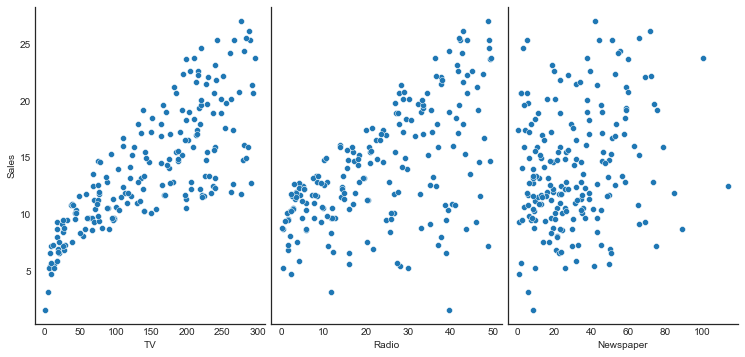

In [5]:
# visualiza la relación entre las características y la respuesta usando diagramas de dispersión
sns.pairplot(advertising, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=0.7)
plt.show()

### Ajuste de mínimos cuadrados
Realizaremos una gráfica mínimos cuadrados usando numpy, matplotlib y seaborn. (*Figura 3.1*)

C:\Users\dayan\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


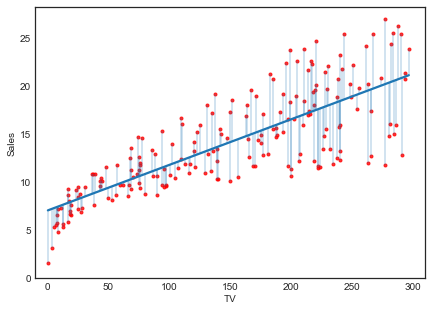

In [6]:
fit = np.polyfit(advertising['TV'], advertising['Sales'], deg=1)
y_hat = fit[1] + advertising['TV'] * fit[0]

plt.figure(figsize=(7, 5))

sns.regplot(advertising['TV'], advertising['Sales'], order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(bottom=0);

plt.vlines(advertising['TV'], y_hat, advertising['Sales'], lw = .4);

## Regresión lineal usando **statsmodels**


In [9]:
# Importacion para usar la "notacion tipo formula" (similar a R)
import statsmodels.formula.api as smf

est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


### Interpretación de los coeficientes del modelo

¿Cómo interpretamos el coeficiente de TV ($\beta_1$)?
- Un aumento de "una unidad" en el gasto publicitario de TV está **asociado con** un aumento de 0.047537 "unidades" en Ventas.
- O más claro: 1,000 $US adicionales gastados en anuncios de televisión están **asociados con** un aumento en las ventas de 47.537 unidades.

Se recalca que si un aumento en el gasto publicitario de TV se asoció con **una** disminución en las ventas, $ \beta_1 $ sería **negativo **.

### Uso del modelo para predicción

Supongamos que había un nuevo mercado en el que el gasto en publicidad televisiva era de **US$ 50,000**. ¿Cúal es predección de las ventas en ese mercado?

$$ y = \beta_0 + \beta_1x $$
$$ y = 7.032594 + 0.047537 \times 50 $$

In [10]:
# Calculando manualmente
est.params[0] + est.params[1]*50

9.409425570778682

#### Por lo tanto, se predice unas Ventas de **9,409 unidades ** en ese mercado.

Se puede también usar `Statsmodels` para hacer la predicción:

In [11]:
# Se debe crear un Dataframe puesto que (la interfaz formula de) Statsmodels lo espera
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [12]:
# se usa el modelo para predecir un nuevo valor (produce una serie)
est.predict(X_new)

0    9.409426
dtype: float64

### Confianza en el modelo

**Pregunta:** ¿La regresión lineal es un modelo de alto sesgo/baja varianza, o un modelo de bajo sesgo/alta varianza?

**Respuesta:** Alto sesgo/baja varianza. realizando un muestreo repetido, la línea permanecerá más o menos en el mismo lugar (baja varianza), pero el promedio de esos modelos no hará un gran trabajo al capturar la verdadera relación (alto sesgo). Se debe tener en cuenta que la baja varianza es una característica útil cuando no se tiene una gran cantidad de datos de entrenamiento.

Un concepto estrechamente relacionado son los **intervalos de confianza**. `Statsmodels` calcula intervalos de confianza del 95% para los coeficientes de nuestro modelo, que se interpretan de la siguiente manera: si la población, de la que se tomó esta muestra, fue **muestreada 100 veces**, aproximadamente **95 de esos intervalos de confianza** podrían contener al "verdadero "coeficiente".



In [13]:
#est.conf_int()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


Note que solo se tiene una **muestra de datos**, y no la **población completa de datos**. El coeficiente "verdadero" puede estár dentro de este intervalo o puede que no, pero no hay manera de sabelo realmente. Lo que se hace es estimar el coeficiente con los datos que se tienen, y se calcula la incertidumbre sobre esa estimación al proporcionar un rango en el que el coeficiente **probablemente** está dentro.

Se debe tener en cuenta que el uso de intervalos de confianza del 95% es solo una convención. Se pueden crear intervalos de confianza del 90% (que serán más estrechos), intervalos de confianza del 99% (que serán más amplios) o los intervalos que desee.

### Prueba de hipótesis y valores de p

Los intervalos de confianza están estrechamente relacionados con **la prueba de hipótesis**. Generalmente, se inicia con una **hipótesis nula** y una **hipótesis alternativa** (que es opuesta a la nula). Luego, se verifica si los datos son compatibles **rechazando la hipótesis nula** o **no rechazando la hipótesis nula**.

(Note que "no rechazar" el valor nulo no es lo mismo que "aceptar" la hipótesis nula. La hipótesis alternativa puede ser verdadera, excepto que simplemente no tiene suficientes datos para mostrar eso).

En lo que se refiere a los coeficientes del modelo, está es la prueba de hipótesis convencional:
- **Hipótesis nula:** No hay relación entre los anuncios de TV y las Ventas (y por lo tanto $\beta_1$ es igual a cero)
- **Hipótesis alternativa:** Existe una relación entre los anuncios de TV y las Ventas (y por lo tanto $\beta_1$ no es igual a cero)

¿Cómo probamos esta hipótesis? Intuitivamente, rechazamos la hipótesis nula (y por lo tanto, creemos en la alternativa) si el intervalo de confianza del 95% **no incluye al cero**. Por el contrario, el **p-valor** representa la probabilidad de que el coeficiente sea realmente cero:

In [14]:
# mostrando los p-valores para los coeficientes del modelo
est.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Si el intervalo de confianza del 95% **incluye al cero**, el p-valor para ese coeficiente será **mayor que 0.05**. Si el intervalo de confianza del 95% **no incluye al cero**, el p-valor será **menor que 0.05**. Por lo tanto, un p-valor menor que 0.05 es una forma de decidir si existe una relación entre el descriptor y la respuesta. (Usar 0.05 como el umbral es solo una convención.)

En este caso, el p-valor para la TV es muy inferior a 0.05, por lo que **se cree** que existe una relación entre los anuncios de TV y las ventas.

Tenga en cuenta que generalmente ignoramos el p-valor para la intersección.

### ¿Qué tan bien se ajusta el modelo  a los datos?
Una primera forma de evaluar el modelo es calculando error estándar residual (residual standard error):

#### Residual standard error: $$RSE =  \sqrt{ \frac{1}{n-2}RSS } $$

#### Primero se calcula el RSS

In [15]:
# RSS con los coeficientes de regresion
RSS = ( ( advertising['Sales'] - (est.params[0] + est.params[1]*advertising['TV']) )**2 ).sum()

print("RSS = {:1.2f}".format(RSS))

RSS = 2102.53


In [16]:
n = advertising.shape[0]
RSE = np.sqrt( RSS/(n-2)) # Residual standard error
print("RSS = {:1.2f}".format(RSE))

RSS = 3.26


## $R^2$

La forma más común de evaluar el ajuste general de un modelo lineal es mediante el valor de __$R^2$__ (R-squared). $R^2$ es la **proporción de la varianza explicada**, es decir, la proporción de la varianza en los datos observados que el modelo explica, o la reducción en el error sobre el **modelo nulo**. (El modelo nulo simplemente hace una predicción mediante el cálculo de la media de la respuesta observada, y así, tiene sólo una intersección y no tiene pendiente).

$R^2$ yace entre 0 y 1, y entre más alto es mejor porque significa que el modelo explica más varianza. Aquí hay un ejemplo de cómo se ve R-squared:

<img src="08_r_squared.png">

Se puede ver que la **línea azul** explica parte de la varianza en los datos ($R^2$ = 0.54), la **línea verde** explica más de la varianza ($R^2$ = 0.64) y la **la línea roja** ajusta los datos de entrenamiento aún más ($R^2$ = 0.66). (¿Parece que la línea roja está sobreajustada?)

A continuación se calcula el valor R-cuadrado para el modelo lineal simple:

In [17]:
# R-squared para el modelo
est.rsquared

0.611875050850071

###  Otros modelos de regresión lineal simple usando de forma independiente otros descriptores

In [18]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [19]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


##  Regresión lineal múltiple
La regresión lineal simple se puede extender fácilmente para incluir múltiples descriptores, a esto se le llama** regresión lineal múltiple**:

$ y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n $

Cada $x$ representa un descriptor diferente, y cada descriptor tiene su propio coeficiente. En este caso:

$ y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper $

A continuación se usa `Statsmodels` para estimar estos coeficientes, de forma similar al caso de sólo una variable, usando el modo formula:

In [20]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.58e-96
Time:                        18:22:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Hipótesis nula en la regresión lineal múltiple
La hipótesis nula se expande aquí para decir que todos los coeficientes son iguales a 0. La alternativa es solo que al menos uno de ellos es significativo. Se realiza una prueba F para probar la significancia.
$$F = \frac {(TSS - RSS) / p} {RSS / (n - p - 1)}$$

### Matriz de correlación 
Se puede utilizar la matriz de correlación usando simplemente el método `corr()` para los DataFrames de Pandas.

In [ ]:
advertising.corr()

## Regresión lineal simple con  Scikit-learn

In [ ]:
# Importando especificamente la regresion lineal
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

# X = advertising['TV'].values.reshape(-1,1)
X = advertising[['TV']]
y = advertising['Sales'] 

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

In [ ]:
type(X)

#### Predicción con scikit-learn

In [ ]:
Sales_pred = regr.predict(X)

In [ ]:
Sales_pred

#### Evaluando el modelo con scikit-learn

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

R2 = r2_score(y, Sales_pred)
MSE = mean_squared_error(y,Sales_pred)
RSE = np.sqrt( MSE*n/(n-2) )

print("R^2 = {:1.3f}".format(R2) )
print("RSE = {:1.3f}".format(RSE))

### Regresión lineal múltiple con Scikit learn

In [ ]:
regr = LinearRegression()

X = advertising[['Radio', 'TV']]
y = advertising.Sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

In [ ]:
pd.DataFrame(regr.coef_, X.columns, columns=['coef'])

## Otras consideraciones de la regresión

### Cargando el dataset ```Credit```

In [ ]:
credit = pd.read_csv('Data/Credit.csv', usecols=list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.head(3)

Algunas de los predictores son categóricos (texto)

In [ ]:
credit.dtypes

### Matriz de dispersión entre varias variables
Graficamos la matriz de dispersión usando `seaborn`

In [ ]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]);

###  Regresión con variables categóricas
Estimaciones de los coeficientes por el método de mínimos cuadrados asociados con la regresión de balance respecto al género in el dataset de `credit`. El género es codificado automáticamente por `statsmodels` como una variable dummy. 

In [ ]:
est = smf.ols('Balance ~ Gender', credit).fit()
est.summary().tables[1]

### Variables con más de una categoría

Ahora realizamos la regresión de *Balance* con respecto a *Ethnicity* en el dataset de `credit`. Aquí, la variable *Ethnicity* tiene tres categorias:

In [ ]:
credit.Ethnicity.value_counts()

`statmodels` codifica al predictor  *Ethnicity*  mediante dos variables *dummy*

In [ ]:
est = smf.ols('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

### Variables de interacción
Para el dataset de Advertising,  las estimaciones de coeficientes de mínimos cuadrados asociadas con la regresión de las ventas respecto al gasto en los anuncios de TV y radio, con un término de interacción, se calcula como:


In [ ]:
est = smf.ols('Sales ~ TV + Radio + TV*Radio', advertising).fit()
est.summary().tables[1]

### Interacción entre variables cuantitativas y cualitativas

In [ ]:
est1 = smf.ols('Balance ~ Income + Student2', credit).fit()
regr1 = est1.params
est2 = smf.ols('Balance ~ Income + Income*Student2', credit).fit()
regr2 = est2.params

print('Regression 1 - without interaction term')
print(regr1)
print('\nRegression 2 - with interaction term')
print(regr2)

## Variables categoricas con scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
model  = LinearRegression()

In [ ]:
try:
    model.fit(credit.drop(columns='Balance'), credit['Balance'])
except Exception as e:
    print(e)
    

scikit-learn no convierte automáticamente las variables categóricas. Hay que convertirlas previamente. Una forma es usando la función `get_dummies` de Pandas. Esta es la forma más sencilla. Sin embargo, en procesos encadenados reales (pipelines) es mejor usar transformadores de scikit-learn como `preprocessing.OneHotEncoder`. Pueden encontrar más información esta [guía de scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features).

Veamos como sería usando `get_dummies`

In [ ]:
credit_num = pd.get_dummies(credit, drop_first=True)
credit_num.sample(3)

In [ ]:
model.fit(credit_num.drop(columns='Balance'), credit_num['Balance'])

In [ ]:
# Calcula el R^2
model.score(credit_num.drop(columns='Balance'), credit_num['Balance'])

In [ ]:
coeff_df = pd.DataFrame(model.coef_,
                        credit_num.drop(columns='Balance').columns,
                        columns=['Coefficient'])
coeff_df